In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\Arnav Agarwal\Desktop\population-prediction\data\indian population new.csv')

In [27]:
useful_data = data[['Year','Population','% Increase in Population']]

In [28]:
def fixdata(string):
    ans = ""
    for i in string:
        if i != ',':
            ans += i 
    return int(ans)

In [32]:
useful_data['Population'] = useful_data['Population'].apply(fixdata)

C:\Users\Arnav Agarwal\AppData\Local\Temp\ipykernel_28508\3923077264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_data['Population'] = useful_data['Population'].apply(fixdata)


In [33]:
useful_data.shape

(73, 3)

<BarContainer object of 25 artists>

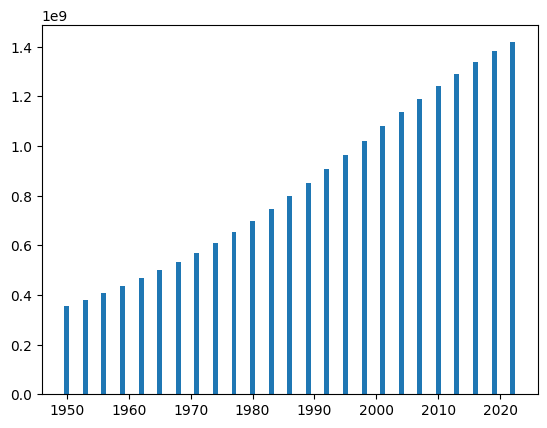

In [34]:
plt.bar(useful_data['Year'][::3],useful_data['Population'][::3])

ARIMA MODEL

In [38]:
from statsmodels.tsa.arima.model import ARIMA
X_train,X_test = pd.Series(useful_data['Population'][:70]) , pd.Series(useful_data['Population'][70:])

In [45]:
train_const = [x for x in X_train]
pred_list = []
for j in range(len(X_test)):
    model = ARIMA(train_const)
    model_fit = model.fit()
    output = model_fit.forecast()
    pred = output[0]
    pred_list.append(pred)
    actual = X_test.iloc[0]
    train_const.append(X_test.iloc[j])

print(pred_list)
print(X_test.values)

[np.float64(813284947.0571429), np.float64(821497653.8169018), np.float64(829637461.9861109)]
[1396387127 1407563842 1417173173]
